In [1]:
import numpy as np

# Task 2

In this task, you will be learning about how Computers represent images. How to read and display images in Python. And how you can apply filters to these images e.g. blurring the image, sharpening, edge detection etc.

## Computer Representation of an image

Think of an image as a 2D grid, where each cell (also known as a pixel) contains a specific colour value. The resolution of an image refers to the number of pixels it contains. Higher resolution means more pixels, which generally translates to a clearer and sharper image. Resolution is often expressed as width x height (e.g., 1920x1080 pixels for Full HD).  

<img src="1.png" alt="pixel-representation-of-an-image" width="200"/>

For colored images, each pixel's color is typically represented using a combination of red, green, and blue (RGB) values. Why exactly RGB? The main reason is because of how display hardware (e.g. monitors) and sensor technology (ones used in cameras) instrinsically work. The displays and camera are built to represent and capture RGB values respectively. Having the same computer representation helps avoid any kind of conversion overhead.

<img src="2.gif" alt="RGB representation of coloured images" width=600>

Another form pixel-value representation which is used is grayscale-representation, typically used in medical imaging e.g. X-rays, MRI, CT-scan and object recognition. Each pixel in grayscale-images contains a single value rather than a size 3 tuple as in the case of RGB images.

<img src="3.png" alt="Grayscale representation of coloured images">

## Importing images in Python

Images in Python are generally read using an external library e.g. Pillow or OpenCV. We will be using OpenCV, since this will be helpful in your Project. Incase you're interested in learning OpenCV in detail (you may refer to this [video](https://www.youtube.com/watch?v=oXlwWbU8l2o)). You won't really need much of OpenCV knowledge except reading and displaying images.

In [2]:
# Commands startig with ! in Jupyter-notebook are shell commands (same as ones you type in your terminal)

!ls

1.png  2.gif  3.jpg  q2.ipynb


In [3]:
!pip install matplotlib
!pip install opencv-contrib-python

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [4]:
import cv2 as cv
import matplotlib.pyplot as plt


# Note: No external libraries barring the ones imported above are allowed.

def display_image(img, title=None):
    """
    Function to display an image using matplotlib. Title is specifiable as an optional argument
    """
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    if title:
        plt.title(title)
    plt.show()

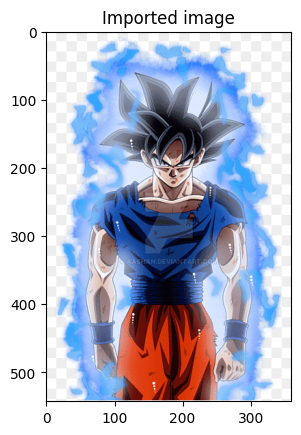

In [5]:
# Images in OpenCV are read using imread() function. The function takes the image names as the input.
img = cv.imread('1.png')

# For displaying images in OpenCV, it is recommended you use the defined function 'display_image()' 
# Generally cv.imshow() function is used for displaying images. But it won't work in Jupyter notebook.
display_image(img, title='Imported image')

In [6]:
print(img)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [238 238 238]
  [238 238 238]
  [238 238 238]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [238 238 238]
  [238 238 238]
  [238 238 238]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [238 238 238]
  [238 238 238]
  [238 238 238]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [238 238 238]
  [238 238 238]
  [238 238 238]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [238 238 238]
  [238 238 238]
  [238 238 238]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [238 238 238]
  [238 238 238]
  [238 238 238]]]


In [7]:
img.shape

(543, 360, 3)

As you can see images in OpenCV are essentially multi-dimension lists. $709$ represent the height of the image in terms of no. of pixels (essentially no. of rows for the list), $642$ is the image width (essentially no. of columns for the list) and $3$ denotes that each cell contains 3 values namely RGB. 

In [8]:
# To print the (200, 200)^th pixel's value
print("Pixel's value", img[200, 200])

Pixel's value [121 121 150]


In [9]:
# To print the pixel value of all the pixels in the range (200, m) where 0<=m<200
print("\nPixel value of all the pixels in the range (200, m)", img[200, 0:200])


Pixel value of all the pixels in the range (200, m) [[238 238 238]
 [238 238 238]
 [238 238 238]
 [238 238 238]
 [238 238 238]
 [238 238 238]
 [238 238 238]
 [238 238 238]
 [238 238 238]
 [238 238 238]
 [238 238 238]
 [238 238 238]
 [238 238 238]
 [238 238 238]
 [238 238 238]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [238 238 238]
 [238 238 238]
 [238 238 238]
 [238 238 238]
 [238 238 238]
 [238 238 238]
 [238 238 238]
 [238 238 238]
 [238 238 238]
 [238 238 238]
 [238 238 238]
 [238 238 238]
 [238 238 238]
 [238 238 238]
 [238 238 238]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 249 246]
 [255 243 234]
 [254 234 223]
 [254 224 207]
 [254 219 198]
 [254 199 171]
 [249 180 111]
 [249 180 111]
 [250 187 119]
 [249 180 111]
 [249 180 111]
 [249 180 111]
 [

Leaving the starting limit unspecified e.g., img[200, : 100] is equivalent to img[200, 0:100]. Similarly, not specifying the last element 

In [19]:
# Printing all the pixel value for first column in the range (m, 0) where 0<=m<150
print(img[:150,0])

[[255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [238 238 238]
 [238 238 238]
 [238 238 238]
 [238 238 238]
 [238 238 238]
 [238 238 238]
 [238 238 238]
 [238 238 238]
 [238 238 238]
 [238 238 238]
 [238 238 238]
 [238 238 238]
 [238 238 238]
 [238 238 238]
 [238 238 238]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [238 238 238]
 [238 238 238]
 [238 238 238]
 [238 238 238]
 [238 238 238]
 [238 238 238]
 [238 238 238]
 [238 238 238]
 [238 238 238]
 [238 238 238]
 [238 238 238]
 [238 238 238]
 [238 238 238]
 [238 238 238]
 [238 238 238]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 

## a) Reading and displaying images

Write python code to read an image of your choice and display only the left half of the image.


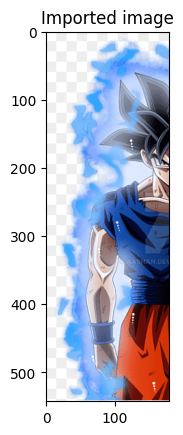

In [20]:
# Write your code here
img = cv.imread('1.png')
display_image(img[:,:180], title='Imported image')


## b) Flipping the image

Write a Python function to flip an image horizontally and vertically.

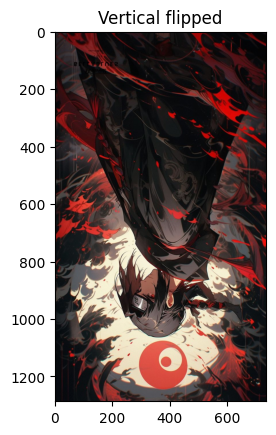

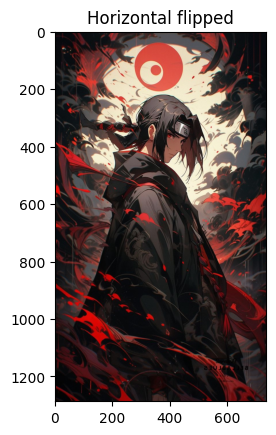

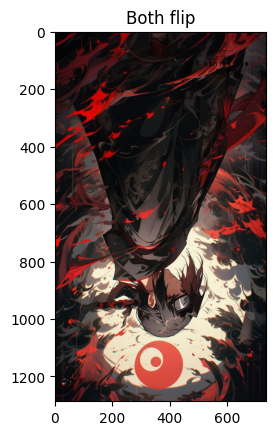

In [29]:
img = cv.imread('itachi.jpg')
def flip_image(img, vertical=False, horizontal=False):
    if(vertical):
        # Write your code here
        img = img[::-1, :]
        
    if(horizontal):
        img = img[:, ::-1]
        # Write your code here
    return img

display_image(flip_image(img,True,False), title='Vertical flipped')
display_image(flip_image(img,False,True), title='Horizontal flipped')
display_image(flip_image(img,True,True), title='Both flip')

# capture = cv.VideoCapture(0)

# while True:
#     isTrue, frame = capture.read()
    
#     cv.imshow('Video',frame)

#     if cv.waitKey(20) & 0xFF == ord('d'):
#         break

# capture.release()
# cv.destroyAllWindows()

Now that you're a little familiar with the digital-representation of an image and some image-handling in Python, you will be tasked with manipulating these images. 

As a Note: Images in OpenCV are essentially numpy arrays and therefore support all numpy operations. This might come in handy later.

# Convolutions

A common operation used in Image Processing is the convolution operation (kind of like a fancy multiplication). You may refer to this [link](https://betterexplained.com/articles/intuitive-convolution/) for an intuitive introduction to the convolution operation.

Imagine you have a quadratic polynomial $ax^2 + bx + c$ represented as using the coefficient list C = [c, b, a], where C[i] = coeff of $x^i$. If we multiply this quadratic polynomial by another quadratic polynomial $dx^2 + ex + f$, then we obtain:

$$
h(x) = (f_2x^2 + f_1x + f_0)(g_2x^2 + g_1x + g_0) = (f_2g_2)x^4 + (f_2g_1 + f_1g_2)x^3 + (f_0g_2 + f_2g_0)x^2 + (f_1g_0 + f_0g_1)x + f_0g_0
$$

Now consider, $$h(x) = \sum_{k=0}^{4} h_k x^k$$
$$h_k = \sum_{i=0}^{k} f_i g_{k-i}$$ 


Just try plugging in some values to verify the same. Now consider the case of $h_2$.
$$h_2 = f[2] \ast g[2] = [f_0 f_1 f_2] \ast [g_0 g_1 g_2]$$

This turns out to be same as flipping the second list $g[2]$ and doing an element-wise multiplication and summing all the element of the obtained list. Here $\ast$ stands for the convolution operation.

Now, one question that might arise in your mind is why to give name to such an operation. The reason is first it occurs frequently in Image Processing and CNNs and second Fast Fourier Tranform which reduces the time complexity of the convolution operation from $\mathcal{O}(n^2)$ to $\mathcal{O}(n\log{}n)$.

## c) Convolution operation

Write a Python function which multiplies two polynomials (given as coefficient lists) using convolution operation defined above.

In [13]:
def consolve_polynomial(poly1, poly2):

  n = len(poly1)+ len(poly2)-1
  a = np.pad(poly1, (0, n - len(poly1)), 'constant')
  b = np.pad(poly2, (0, n - len(poly2)), 'constant')

  A = np.fft.fft(a)
  B = np.fft.fft(b)

  C = A * B

  c = np.fft.ifft(C)

  return np.rint(c).astype(int).tolist()

a = [1, 2, 3]
b = [4, 5, 6]

c = consolve_polynomial(a, b)

print(c)

[4, 13, 28, 27, 18]


/tmp/ipykernel_19149/3941821251.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.rint(c).astype(int).tolist()


# Image Convolution



## d) 2D Convolution

Write a python function which implements the convolution operation on an image given the kernel. Please refer to this [video](https://www.youtube.com/watch?v=8rrHTtUzyZA) by Grant Sanderson to learn about 2D convolutions and how it is connected to the context of blurring images.

In [14]:
def convolve_2d(image, kernel):
    output_size = (image.shape[0] + kernel.shape[0] - 1, image.shape[1] + kernel.shape[1] - 1)
    
    padded_image = np.pad(image, ((0, output_size[0] - image.shape[0]), (0, output_size[1] - image.shape[1])), mode='constant')
    padded_kernel = np.pad(kernel, ((0, output_size[0] - kernel.shape[0]), (0, output_size[1] - kernel.shape[1])), mode='constant')
    
    fft_image = np.fft.fft2(padded_image)
    fft_kernel = np.fft.fft2(padded_kernel)
    
    fft_convolved = fft_image * fft_kernel
    
    result = np.fft.ifft2(fft_convolved).real
    
    crop_size = kernel.shape[0] // 2
    result_cropped = result[crop_size:-crop_size, crop_size:-crop_size]
    
    return result_cropped.astype(np.uint8)


## e) Blurring Images

Write a python function which blur an image using the Gaussian Blur kernel.

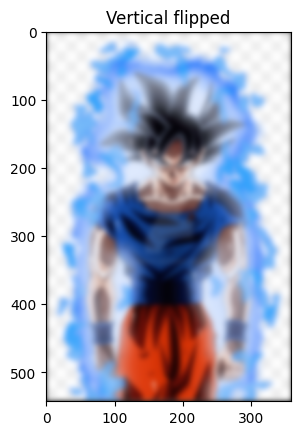

In [23]:
def gaussian_kernel(size, sigma):
    """Generate a 2D Gaussian kernel."""
    kernel = np.fromfunction(lambda x, y: (1/(2*np.pi*sigma**2)) * np.exp(-((x - size//2)**2 + (y - size//2)**2)/(2*sigma**2)), (size, size))
    return kernel / np.sum(kernel)

def blurImage(img, kernel_size,blureffect):
    image = img

    a,b,c = cv.split(image)

    sigma = blureffect
    kernel = gaussian_kernel(kernel_size, sigma)

    a = convolve_2d(a, kernel)
    b = convolve_2d(b, kernel)
    c = convolve_2d(c, kernel)

    result = cv.merge((a,b,c))
    return result
    # Write your code here (Preferably use the 2D_convolution() function from the previous part)


image = cv.imread("1.png")
# display_image(image, title='Vertical flipped')
display_image(blurImage(image,99,4), title='Vertical flipped')

## f) Sharpening images

Write a python function which sharpens an image. Try to find the associated kernel for sharpening images.

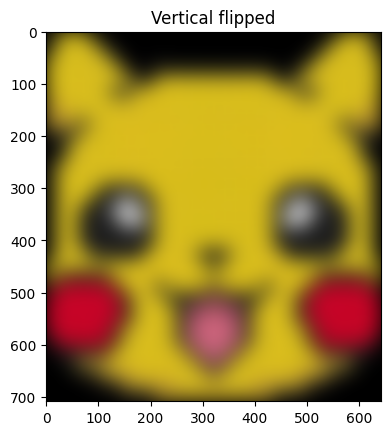

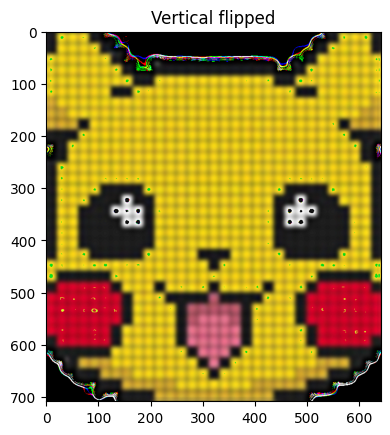

In [31]:
def sharpen_kernel(kernel_size, sharpness):
    if kernel_size % 2 == 0:
        kernel_size += 1

    # Create a sharpening kernel
    sharpen_kernel = np.zeros((kernel_size, kernel_size), dtype=np.float32)

    # Calculate the center index
    center = kernel_size // 2

    # Set the center element
    sharpen_kernel[center, center] = 1 + sharpness

    # Set the surrounding elements
    sharpen_kernel -= sharpness / (kernel_size * kernel_size)

    # Normalize the kernel
    sharpen_kernel /= np.sum(sharpen_kernel)
    return sharpen_kernel

def sharpenImage(img, kernel_size,sharpness):
    image = img
    # grey = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    a,b,c = cv.split(image)

    kernel = sharpen_kernel(kernel_size, sharpness)

    a = convolve_2d(a, kernel)
    b = convolve_2d(b, kernel)
    c = convolve_2d(c, kernel)
    # result = convolve_2d(grey,kernel)
    result = cv.merge((a,b,c))
    return result
    # Write your code here (Preferably use the 2D_convolution() function from the previous part)
image = cv.imread("pika.png")

# display_image(image, title='Vertical flipped')
display_image(blurImage(image,99,20), title='Vertical flipped')
display_image(sharpenImage(blurImage(image,99,5),10,3), title='Vertical flipped')

## Bonus: Edge detection

Write a Python function to do Edge detection. For the theory part regarding how edge detection works, you may refer to the first 5 videos of this [playlist](https://www.youtube.com/playlist?list=PL2zRqk16wsdqXEMpHrc4Qnb5rA1Cylrhx).